# LSTMs test

In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
import os
%load_ext autoreload
%autoreload 1


#os.chdir(".\\lib")
print(os.getcwd())

import models, ingest, predict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\Mikey\Documents\Github\Hysterisis-ML-Modeling\lib


In [127]:
csv = "..\\data\\USGS_WS_2017_2023.csv"
columns = {
           "Peoria_WL": "Peoria_WL",
           "Henry_WL": "Henry_WL",
           "Flow": "Flow",
           "Vel": "Vel",
           "Slope": "Slope"
           }
target = "Flow"
data_name = "USGS_WS_2017_2023"
USGS_FLAG = True

target = "Flow"


train_scaled, test_scaled, train_dates, test_dates, all_dates, scaler = ingest.ingest(csv, target, renames= columns, USGS_FLAG=USGS_FLAG)


trainX, trainY = ingest.reshape(train_scaled)#, timestep_type= "hr")
testX, testY = ingest.reshape(test_scaled)#, timestep_type= "hr")


c:\Users\Mikey\Documents\Github\Hysterisis-ML-Modeling\lib\ingest.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_range, test_range = [all_dates[0], all_dates[-1]], [all_dates[0], all_dates[-1]]


In [128]:
trainX

array([[[ 0.20842176, -0.39074207, -0.13179477,  0.79287625,
          1.15802436],
        [ 0.04137234, -0.45350442, -0.22421608,  0.54318959,
          1.00516662],
        [-0.08209897, -0.55078605, -0.32558138,  0.36949453,
          0.96225918],
        ...,
        [-0.65006699, -0.56647663, -0.70719194, -0.6075402 ,
         -0.82376287],
        [-0.51788006, -0.48488559, -0.6207333 , -0.35785354,
         -0.77817371],
        [-0.16925519, -0.41898513, -0.44185335,  0.27179106,
         -0.21233189]],

       [[ 0.04137234, -0.45350442, -0.22421608,  0.54318959,
          1.00516662],
        [-0.08209897, -0.55078605, -0.32558138,  0.36949453,
          0.96225918],
        [-0.09662501, -0.63551521, -0.37924537,  0.38035047,
          1.09366321],
        ...,
        [-0.51788006, -0.48488559, -0.6207333 , -0.35785354,
         -0.77817371],
        [-0.16925519, -0.41898513, -0.44185335,  0.27179106,
         -0.21233189],
        [ 0.9056715 , -0.29973668,  0.0679545 , 

In [124]:
df= pd.read_csv(csv)
df =  df[['datetime'] + [target] + list(filter(lambda x: x!=target, list(columns.values())))] if( target in list(columns.values())) else df[['datetime'] +[target] + list(renames.values())]


In [125]:
df

,datetime,Flow,Peoria_WL,Henry_WL,Vel,Slope
0,1/1/2017 6:00,20400.0,440.91,442.800,2.45,1.020000e-05
1,1/2/2017 6:00,18100.0,440.71,442.490,2.22,9.630000e-06
2,1/3/2017 6:00,16400.0,440.40,442.150,2.06,9.470000e-06
3,1/4/2017 6:00,16200.0,440.13,441.970,2.07,9.960000e-06
4,1/5/2017 6:00,18500.0,439.69,441.890,2.40,1.190000e-05
...,...,...,...,...,...,...
2155,11/26/2022 6:00,3670.0,439.78,440.050,0.51,1.460000e-06
2156,11/27/2022 6:00,5930.0,440.19,440.200,0.83,5.410000e-08
2157,11/28/2022 6:00,5380.0,439.99,440.220,0.75,1.240000e-06
2158,11/29/2022 6:00,6710.0,439.82,440.345,0.93,2.840000e-06


In [130]:

model_name =  "Stacked_LSTM"#,'Bidirectional_LSTM','Attention_LSTM', "GRU"]

model = models.prebuilt_models(model_name, trainX, trainY, epochs=2, batch_size= 32)
validation_loss = models.evaluate_model(model, testX, testY)
models.plot_model( model_name, validation_loss, None)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 288, 64)           17920     
                                                                 
 dropout_9 (Dropout)         (None, 288, 64)           0         
                                                                 
 lstm_10 (LSTM)              (None, 288, 64)           33024     
                                                                 
 dropout_10 (Dropout)        (None, 288, 64)           0         
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

INFO:tensorflow:Assets written to: saved_model_multi/None/Stacked_LSTM_Saved_None\assets


saving history
evaluating model
59/59 [==============================] - 4s 71ms/step - loss: 0.7842
Validation loss: 0.7842156291007996


In [53]:
#predict_date_range=['2020-05-15 00:00:00-00:00', '2020-07-01 00:00:00-00:00']

predicts = predict.predict(model_name, testX)

predicts

retrieving and loading model
predicting
59/59 [==============================] - 6s 78ms/step


,0
0,-0.563839
1,-0.512318
2,-0.416317
3,-0.289182
4,-0.158607
...,...
1856,-0.638408
1857,-0.639914
1858,-0.642236
1859,-0.642799


In [54]:
%aimport predict
%aimport ingest
%aimport models




In [55]:




# So much work for a oneliner HAHA
df =  df[[target] + list(filter(lambda x: x!=target, list(renames.values())))] if( target in list(renames.values())) else df[[target] + list(renames.values())]

df = df.set_index('datetime')
pd.to_datetime(df.index)

C:\Users\Mikey\AppData\Local\Temp\ipykernel_19444\570327405.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df.index)


DatetimeIndex(['2017-01-01 06:00:00', '2017-01-02 06:00:00',
               '2017-01-03 06:00:00', '2017-01-04 06:00:00',
               '2017-01-05 06:00:00', '2017-01-06 06:00:00',
               '2017-01-07 06:00:00', '2017-01-08 06:00:00',
               '2017-01-09 06:00:00', '2017-01-10 06:00:00',
               ...
               '2022-11-21 06:00:00', '2022-11-22 06:00:00',
               '2022-11-23 06:00:00', '2022-11-24 06:00:00',
               '2022-11-25 06:00:00', '2022-11-26 06:00:00',
               '2022-11-27 06:00:00', '2022-11-28 06:00:00',
               '2022-11-29 06:00:00', '2022-11-30 06:00:00'],
              dtype='datetime64[ns]', name='datetime', length=2160, freq=None)

In [56]:
testY

array([[ 1.04366885],
       [ 0.68051794],
       [ 0.52799456],
       ...,
       [-0.88248358],
       [-0.78588543],
       [-0.68928729]])

c:\Users\Mikey\Documents\Github\Hysterisis-ML-Modeling\lib\predict.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(testY.index), testY.iloc[:, 0], label='Actual')
c:\Users\Mikey\Documents\Github\Hysterisis-ML-Modeling\lib\predict.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(testY.index), predicts.iloc[:, 0], label='Predicted')


FileNotFoundError: [Errno 2] No such file or directory: 'model_results/test/test_predictions.png'

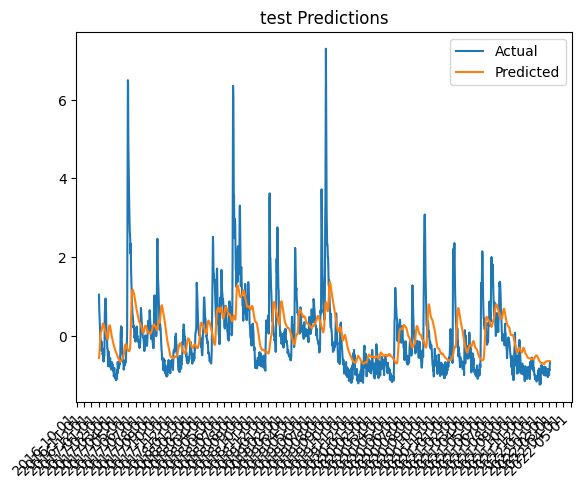

In [59]:

predict.plot_predicts("test", predicts, testY, test_dates)


In [60]:
shape = test_dates.shape[0] if predicts.shape[0] > test_dates.shape[0] else predicts.shape[0]


# Add dates to the sets
testY = pd.DataFrame(testY, index= test_range[:shape])
testY.index = pd.to_datetime(testY.index)

In [ ]:


'''
model_names = ['Basic_LSTM', 'Stacked_LSTM', 'Bidirectional_LSTM', 'Attention_LSTM']
for model_name in model_names:
    model, history = models.prebuilt_models(model_name, trainX, trainY)
    validation_loss = models.evaluate_model(model, testX, testY)
    models.plot_model(history, model_name, validation_loss)
'''

